In [1]:
%matplotlib widget
from __future__ import division
import sympy as sp
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# LoD 1 (4 pts/m2)
Height - median of mesurement grid

In [2]:
def z_roof(X, width, height):
    a = -height/(width/2)
    return a*np.abs(X) + height

In [3]:
def one_mcs_LOD1(angle, width, depth, height):
    init_point = [np.random.uniform(-width/2, -width/2+1), np.random.uniform(-depth/2, -depth/2+1)]
    x_scan = np.arange(init_point[0] - 2, width/2 + 2, 1)
    y_scan = np.arange(init_point[1] - 2, depth/2 + 2, 1)

    xx_scan, yy_scan = np.meshgrid(x_scan, y_scan)

    Xr   =  np.cos(angle)*xx_scan + np.sin(angle)*yy_scan  # "cloclwise"
    Yr   = -np.sin(angle)*xx_scan + np.cos(angle)*yy_scan

    Xr_org = Xr.copy()

    Xr = Xr[np.logical_and(abs(Xr) < width/2, abs(Yr) < depth/2)]
    Yr = Yr[np.logical_and(abs(Xr_org) < width/2, abs(Yr) < depth/2)]

    z_meas = z_roof(Xr, width, height)

    return np.median(z_meas)

In [4]:
def monte_carlo_avg_height(width, depth, height):
    return np.mean(np.array([np.mean(np.array([one_mcs_LOD1(angle, width, depth, height) for _ in range(100)])) for angle in np.linspace(0, np.pi/2, 180)]))

In [5]:
def monte_carlo_min_height(width, depth, height):
    return np.min(np.array([np.min(np.array([one_mcs_LOD1(angle, width, depth, height) for _ in range(100)])) for angle in np.linspace(0, np.pi/2, 180)]))

In [138]:
width = 12.44
height = 2
depth = 15.65

In [139]:
xr = np.linspace(-width/2, width/2)
yr = np.linspace(-depth/2, depth/2)

X, Y = np.meshgrid(xr, yr)

In [140]:
angle = np.random.uniform(0, np.pi/2)
init_point = [np.random.uniform(-width/2, -width/2+1), np.random.uniform(-depth/2, -depth/2+1)]
x_scan = np.arange(init_point[0] - 2, width/2 + 2, 1)
y_scan = np.arange(init_point[1] - 2, depth/2 + 2, 1)

xx_scan, yy_scan = np.meshgrid(x_scan, y_scan)

Xr   =  np.cos(angle)*xx_scan + np.sin(angle)*yy_scan  # "cloclwise"
Yr   = -np.sin(angle)*xx_scan + np.cos(angle)*yy_scan

Xr_org = Xr.copy()

Xr = Xr[np.logical_and(abs(Xr) < width/2, abs(Yr) < depth/2)]
Yr = Yr[np.logical_and(abs(Xr_org) < width/2, abs(Yr) < depth/2)]

z_meas = z_roof(Xr, width, height)

Xr_LoD1 = Xr.copy()
Yr_LoD1 = Yr.copy()
z_meas_LoD1 = z_meas.copy()


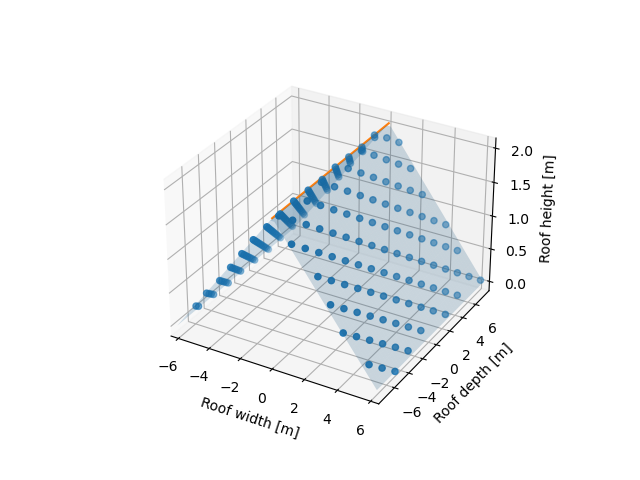

In [141]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# plot the surface
ax.plot_surface(X, Y, z_roof(X, width, height), alpha=0.2)
ax.plot3D(np.zeros(shape=(50, )), np.linspace(-depth/2, depth/2), height)
ax.scatter3D(Xr, Yr, z_meas)

ax.set_xlim(-width/2, width/2)
ax.set_ylim(-depth/2, depth/2)
ax.set_xlabel("Roof width [m]")
ax.set_ylabel("Roof depth [m]")
ax.set_zlabel("Roof height [m]")
plt.show()

## Worst-Case scenario measurement error

In [10]:
w_tab = np.arange(6, 18, 0.1)
meas_tab_width = np.array([monte_carlo_min_height(w, depth, height) for w in w_tab])

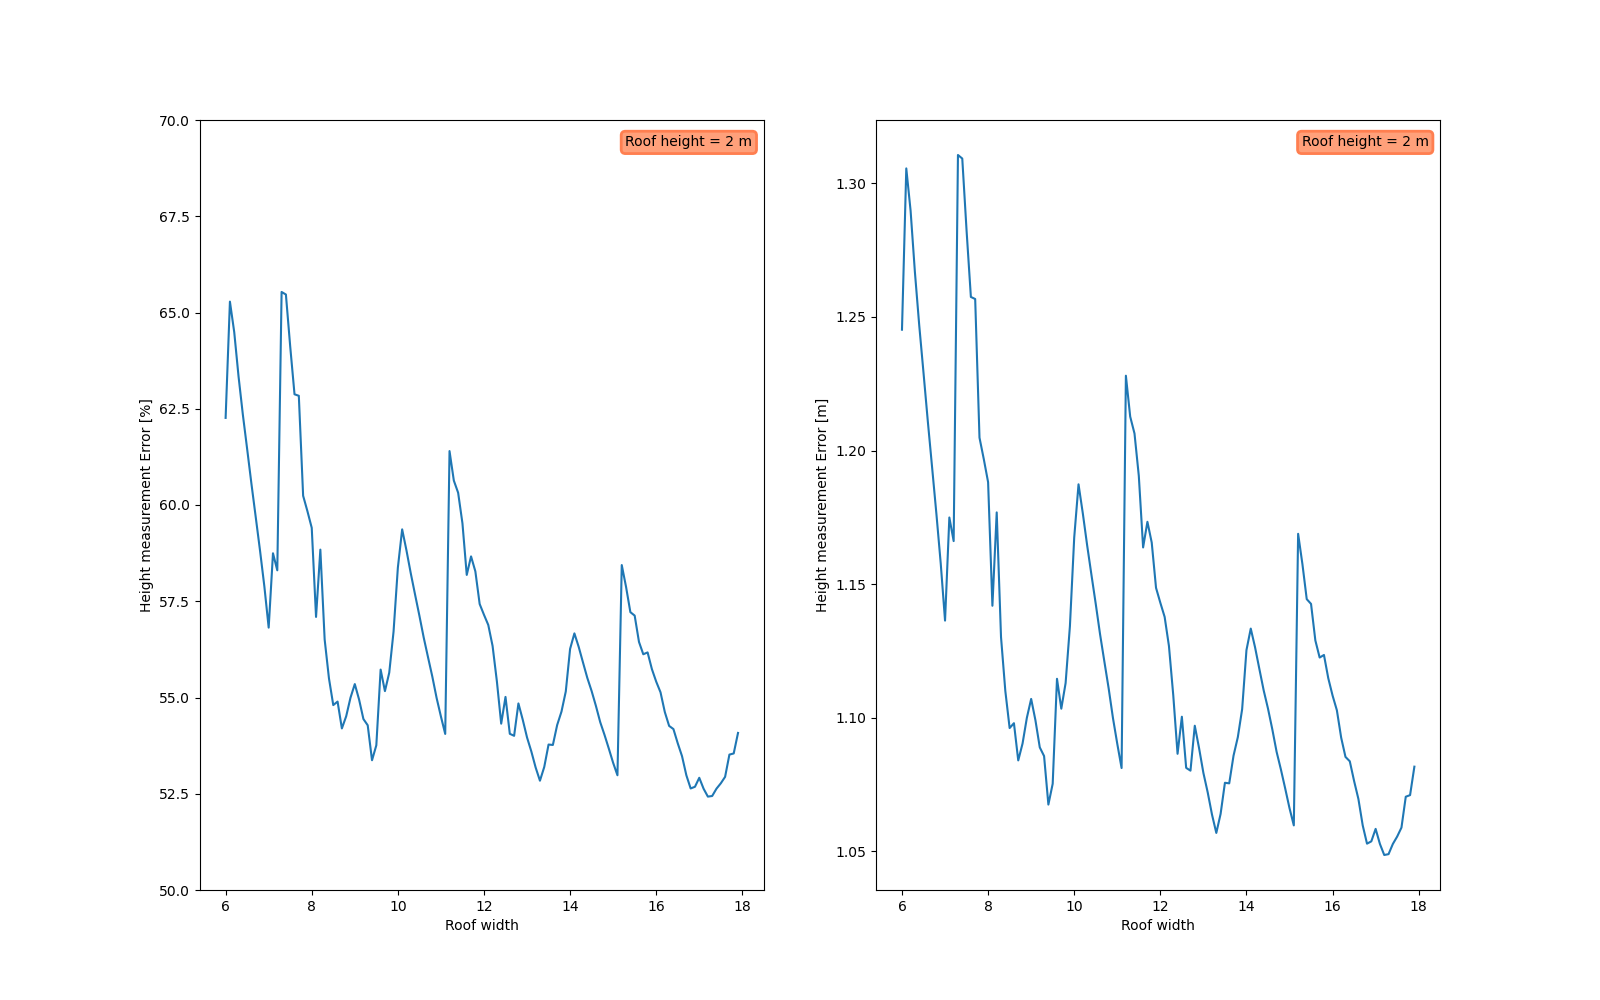

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(16, 10))
axs[0].plot(w_tab, (height - meas_tab_width)/height*100)
axs[0].set_xlabel("Roof width")
axs[0].set_ylabel("Height measurement Error [%]")
axs[0].set_ylim(50, 70)
axs[0].text(0.98, 0.98, f"Roof height = {height} m", bbox=dict(boxstyle="round", fc="lightsalmon", ec="coral", lw=2), horizontalalignment='right', verticalalignment='top', transform=axs[0].transAxes)

axs[1].plot(w_tab, (height - meas_tab_width))
axs[1].set_xlabel("Roof width")
axs[1].set_ylabel("Height measurement Error [m]")
axs[1].text(0.98, 0.98, f"Roof height = {height} m", bbox=dict(boxstyle="round", fc="lightsalmon", ec="coral", lw=2), horizontalalignment='right', verticalalignment='top', transform=axs[1].transAxes);

In [12]:
h_tab = np.arange(1, 4, 0.05)
meas_tab_height = np.array([monte_carlo_min_height(width, depth, h) for h in h_tab])

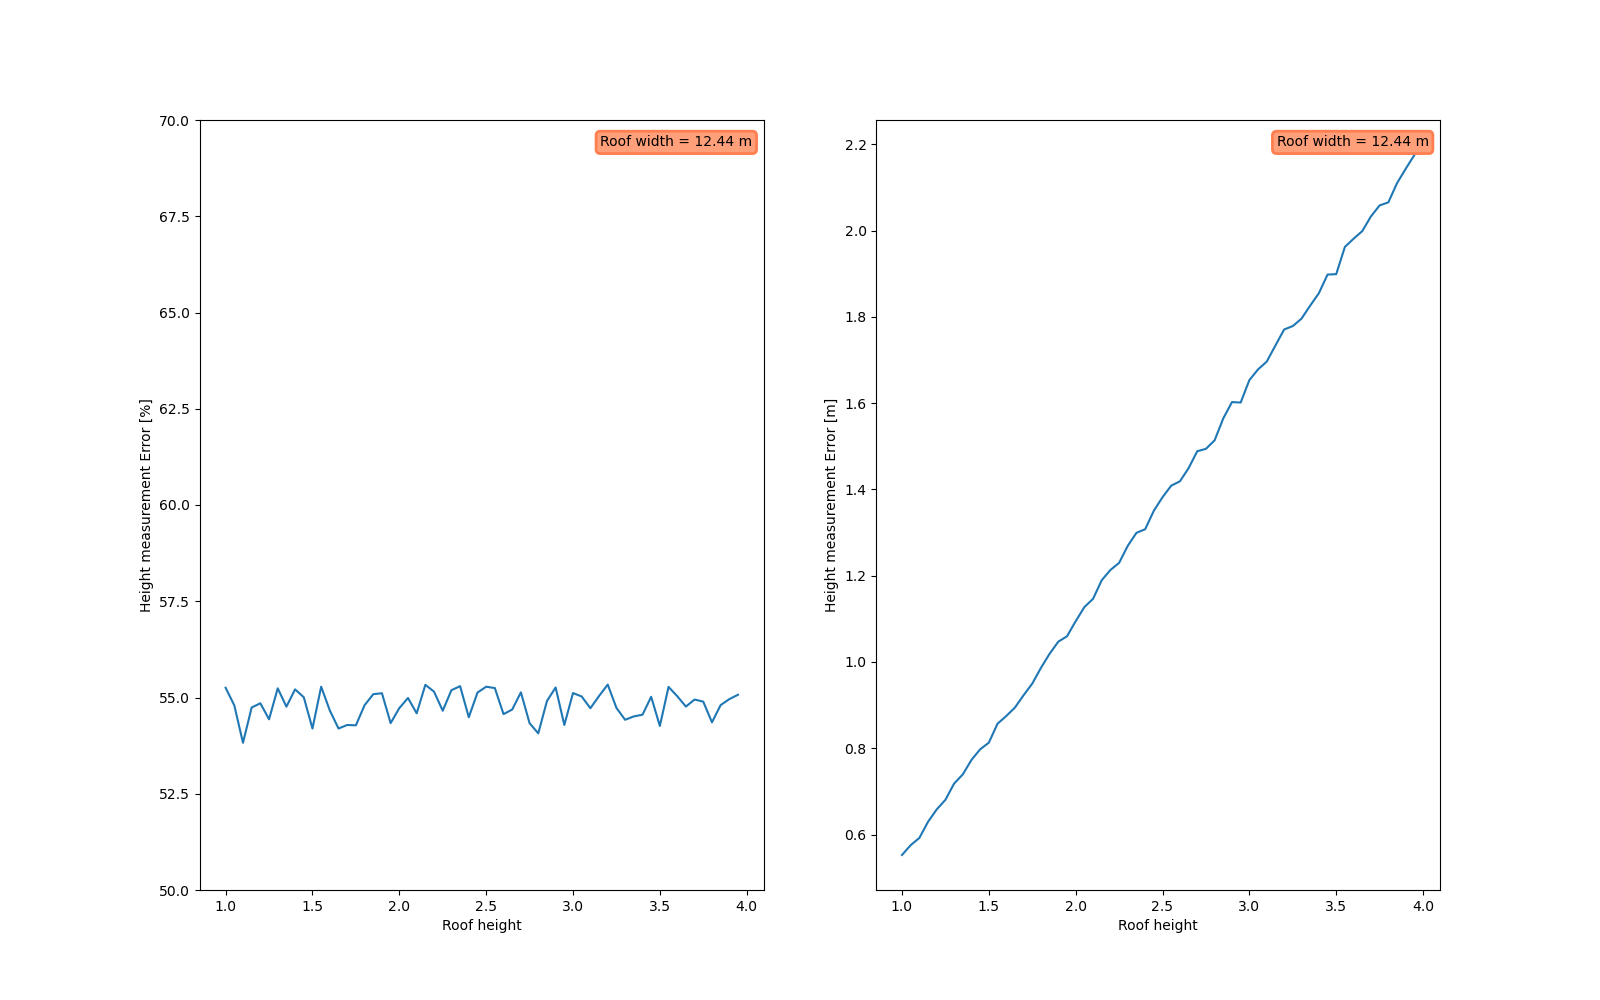

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(16, 10))
axs[0].plot(h_tab, (h_tab - meas_tab_height)/h_tab*100)
axs[0].set_xlabel("Roof height")
axs[0].set_ylabel("Height measurement Error [%]")
axs[0].set_ylim(50, 70)
axs[0].text(0.98, 0.98, f"Roof width = {width} m", bbox=dict(boxstyle="round", fc="lightsalmon", ec="coral", lw=2), horizontalalignment='right', verticalalignment='top', transform=axs[0].transAxes)

axs[1].plot(h_tab, (h_tab - meas_tab_height))
axs[1].set_xlabel("Roof height")
axs[1].set_ylabel("Height measurement Error [m]")
axs[1].text(0.98, 0.98, f"Roof width = {width} m", bbox=dict(boxstyle="round", fc="lightsalmon", ec="coral", lw=2), horizontalalignment='right', verticalalignment='top', transform=axs[1].transAxes);

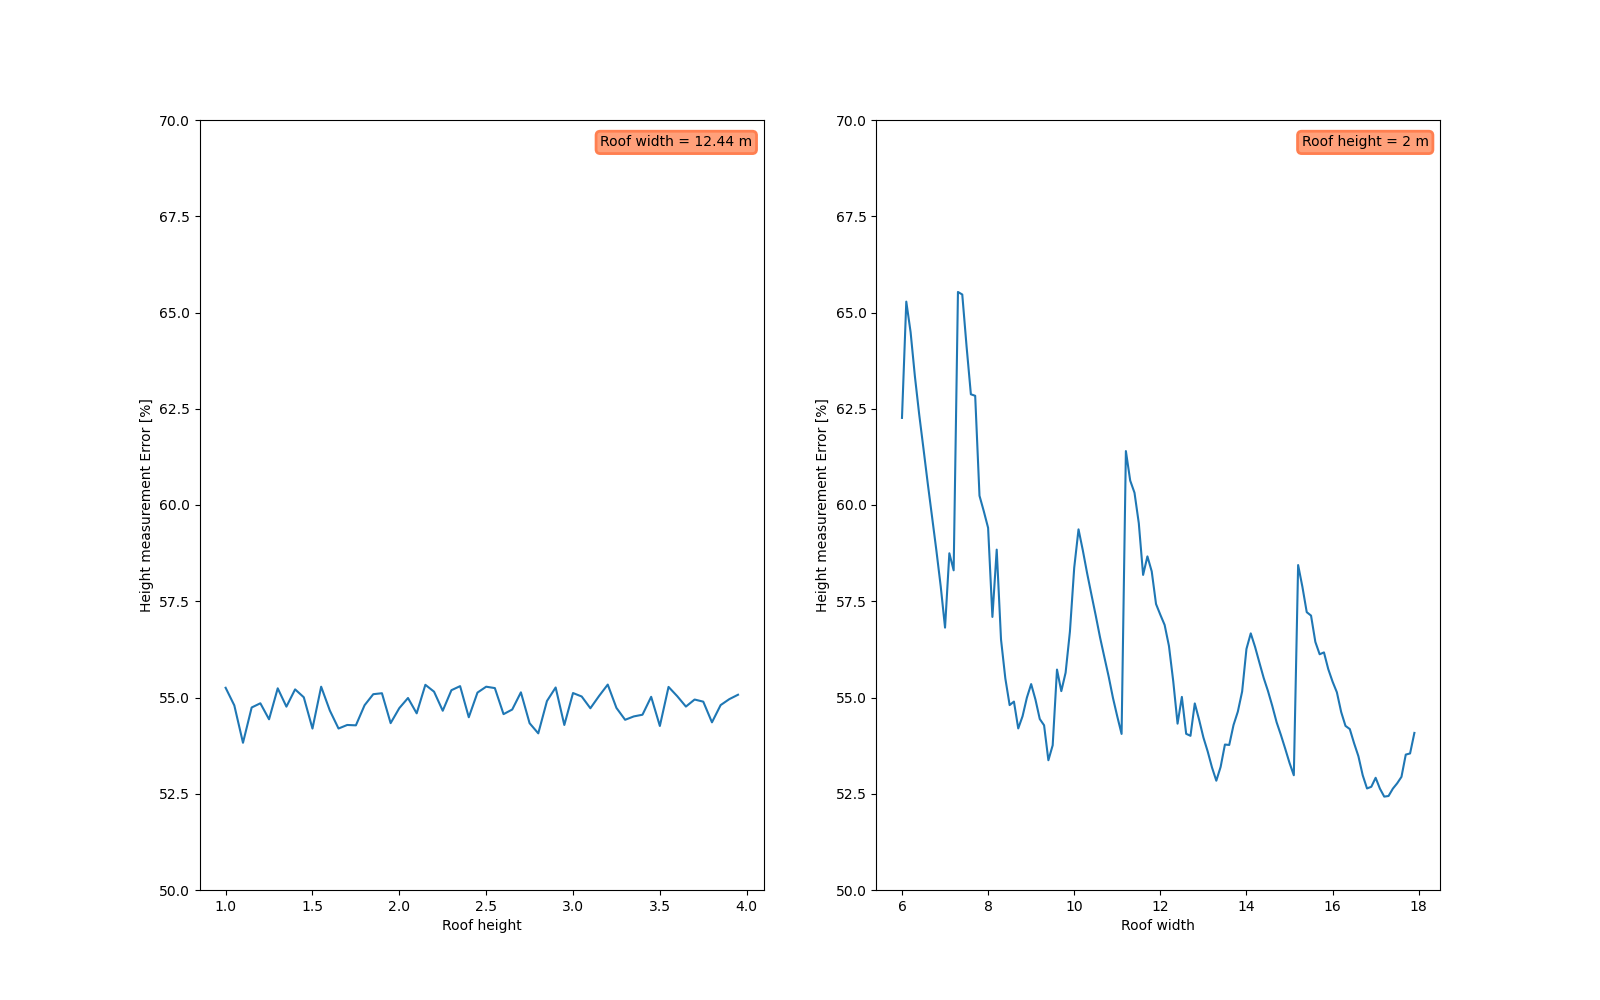

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(16, 10))
axs[0].plot(h_tab, (h_tab - meas_tab_height)/h_tab*100)
axs[0].set_xlabel("Roof height")
axs[0].set_ylim(50, 70)
axs[0].set_ylabel("Height measurement Error [%]")
axs[0].text(0.98, 0.98, f"Roof width = {width} m", bbox=dict(boxstyle="round", fc="lightsalmon", ec="coral", lw=2), horizontalalignment='right', verticalalignment='top', transform=axs[0].transAxes)

axs[1].plot(w_tab, (height - meas_tab_width)/height*100)
axs[1].set_xlabel("Roof width")
axs[1].set_ylabel("Height measurement Error [%]")
axs[1].set_ylim(50, 70)
axs[1].text(0.98, 0.98, f"Roof height = {height} m", bbox=dict(boxstyle="round", fc="lightsalmon", ec="coral", lw=2), horizontalalignment='right', verticalalignment='top', transform=axs[1].transAxes);

## Average measurement error

In [15]:
w_tab = np.arange(6, 18, 0.1)
meas_tab_width_avg = np.array([monte_carlo_avg_height(w, depth, height) for w in w_tab])

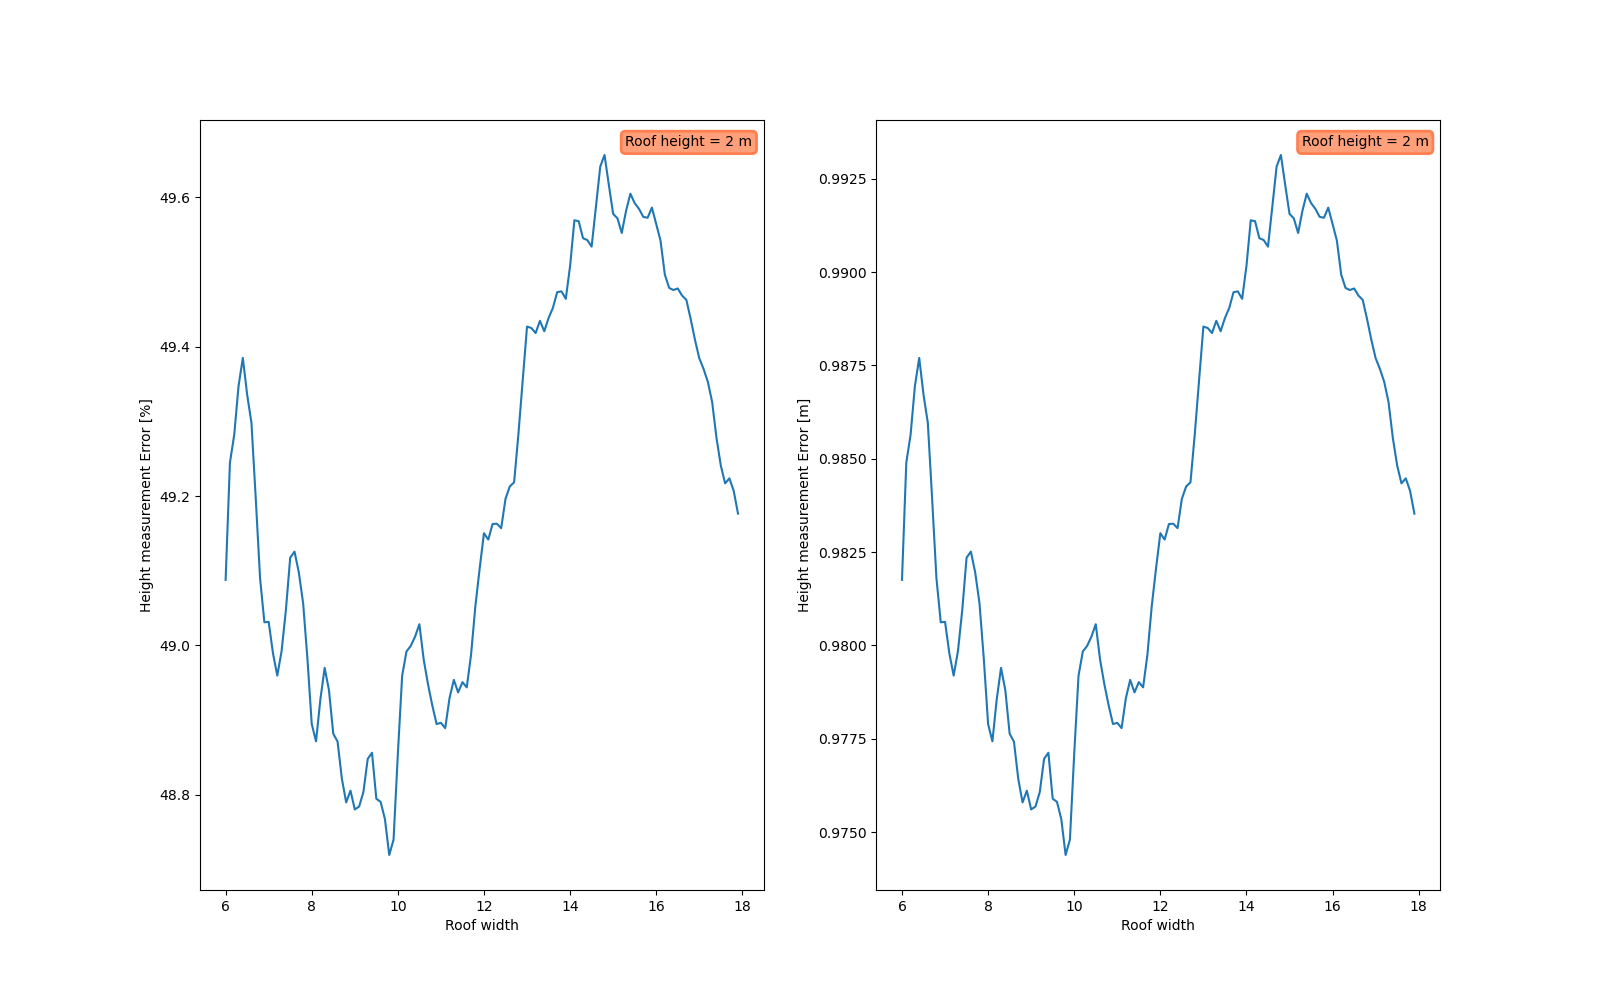

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(16, 10))
axs[0].plot(w_tab, (height - meas_tab_width_avg)/height*100)
axs[0].set_xlabel("Roof width")
axs[0].set_ylabel("Height measurement Error [%]")
# axs[0].set_ylim(0, 2)
axs[0].text(0.98, 0.98, f"Roof height = {height} m", bbox=dict(boxstyle="round", fc="lightsalmon", ec="coral", lw=2), horizontalalignment='right', verticalalignment='top', transform=axs[0].transAxes)

axs[1].plot(w_tab, (height - meas_tab_width_avg))
axs[1].set_xlabel("Roof width")
axs[1].set_ylabel("Height measurement Error [m]")
axs[1].text(0.98, 0.98, f"Roof height = {height} m", bbox=dict(boxstyle="round", fc="lightsalmon", ec="coral", lw=2), horizontalalignment='right', verticalalignment='top', transform=axs[1].transAxes);

In [17]:
h_tab = np.arange(1, 4, 0.05)
meas_tab_height_avg = np.array([monte_carlo_avg_height(width, depth, h) for h in h_tab])

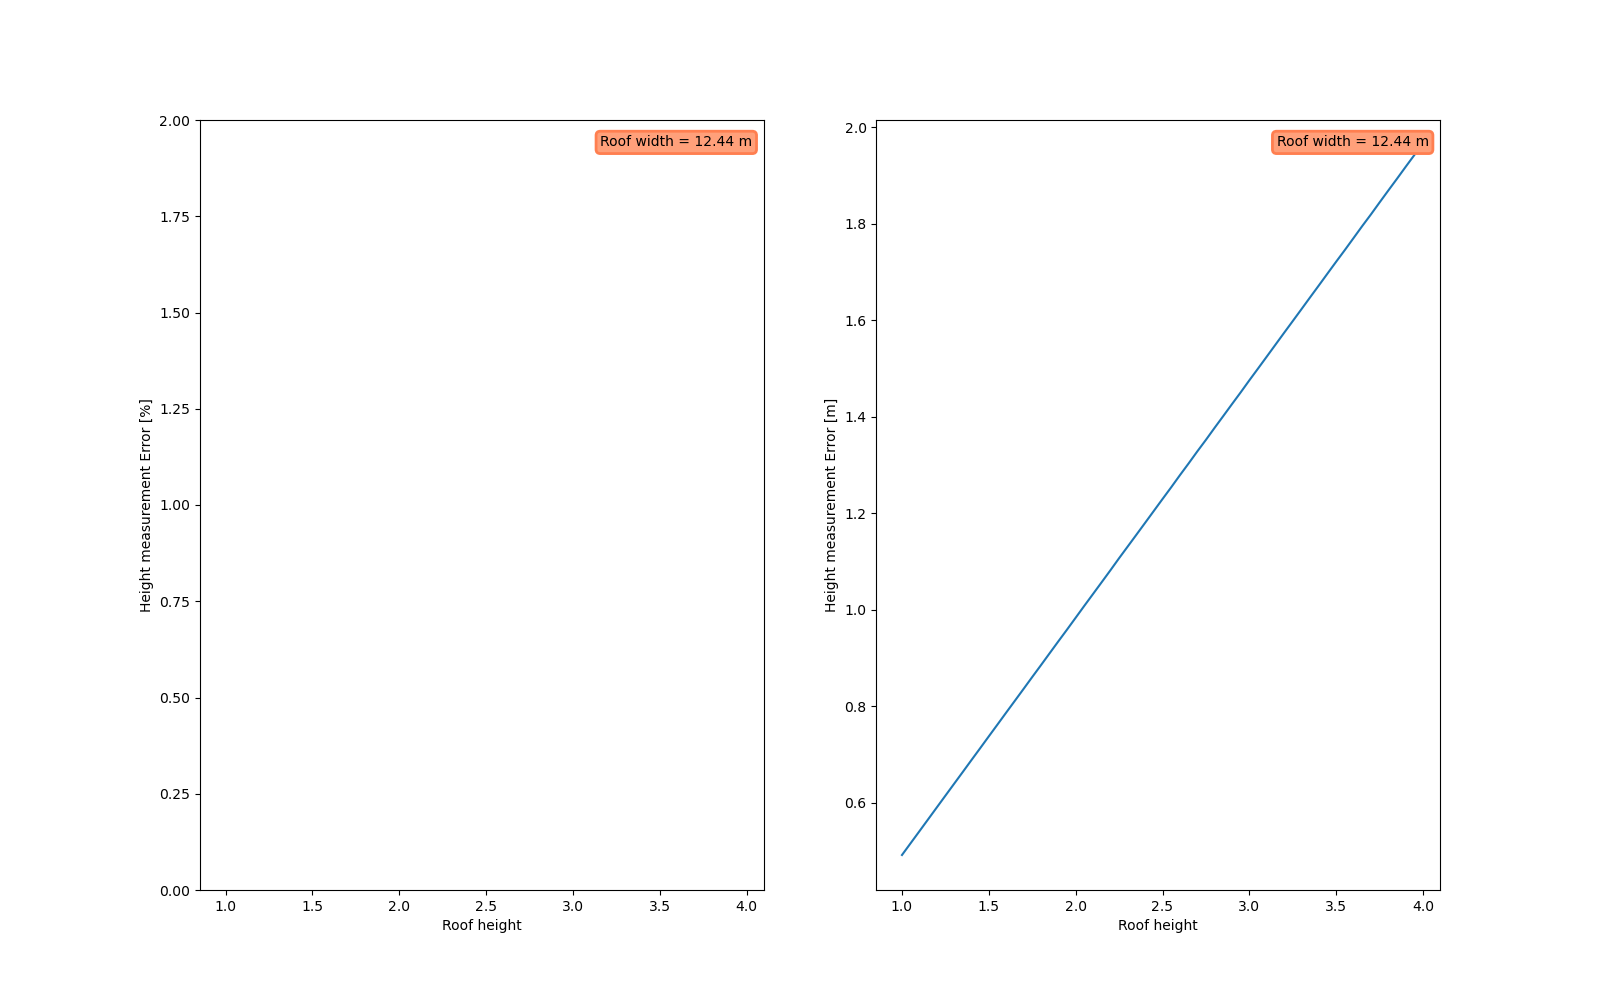

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(16, 10))
axs[0].plot(h_tab, (h_tab - meas_tab_height_avg)/h_tab*100)
axs[0].set_xlabel("Roof height")
axs[0].set_ylabel("Height measurement Error [%]")
axs[0].set_ylim(0, 2)
axs[0].text(0.98, 0.98, f"Roof width = {width} m", bbox=dict(boxstyle="round", fc="lightsalmon", ec="coral", lw=2), horizontalalignment='right', verticalalignment='top', transform=axs[0].transAxes)

axs[1].plot(h_tab, (h_tab - meas_tab_height_avg))
axs[1].set_xlabel("Roof height")
axs[1].set_ylabel("Height measurement Error [m]")
axs[1].text(0.98, 0.98, f"Roof width = {width} m", bbox=dict(boxstyle="round", fc="lightsalmon", ec="coral", lw=2), horizontalalignment='right', verticalalignment='top', transform=axs[1].transAxes);

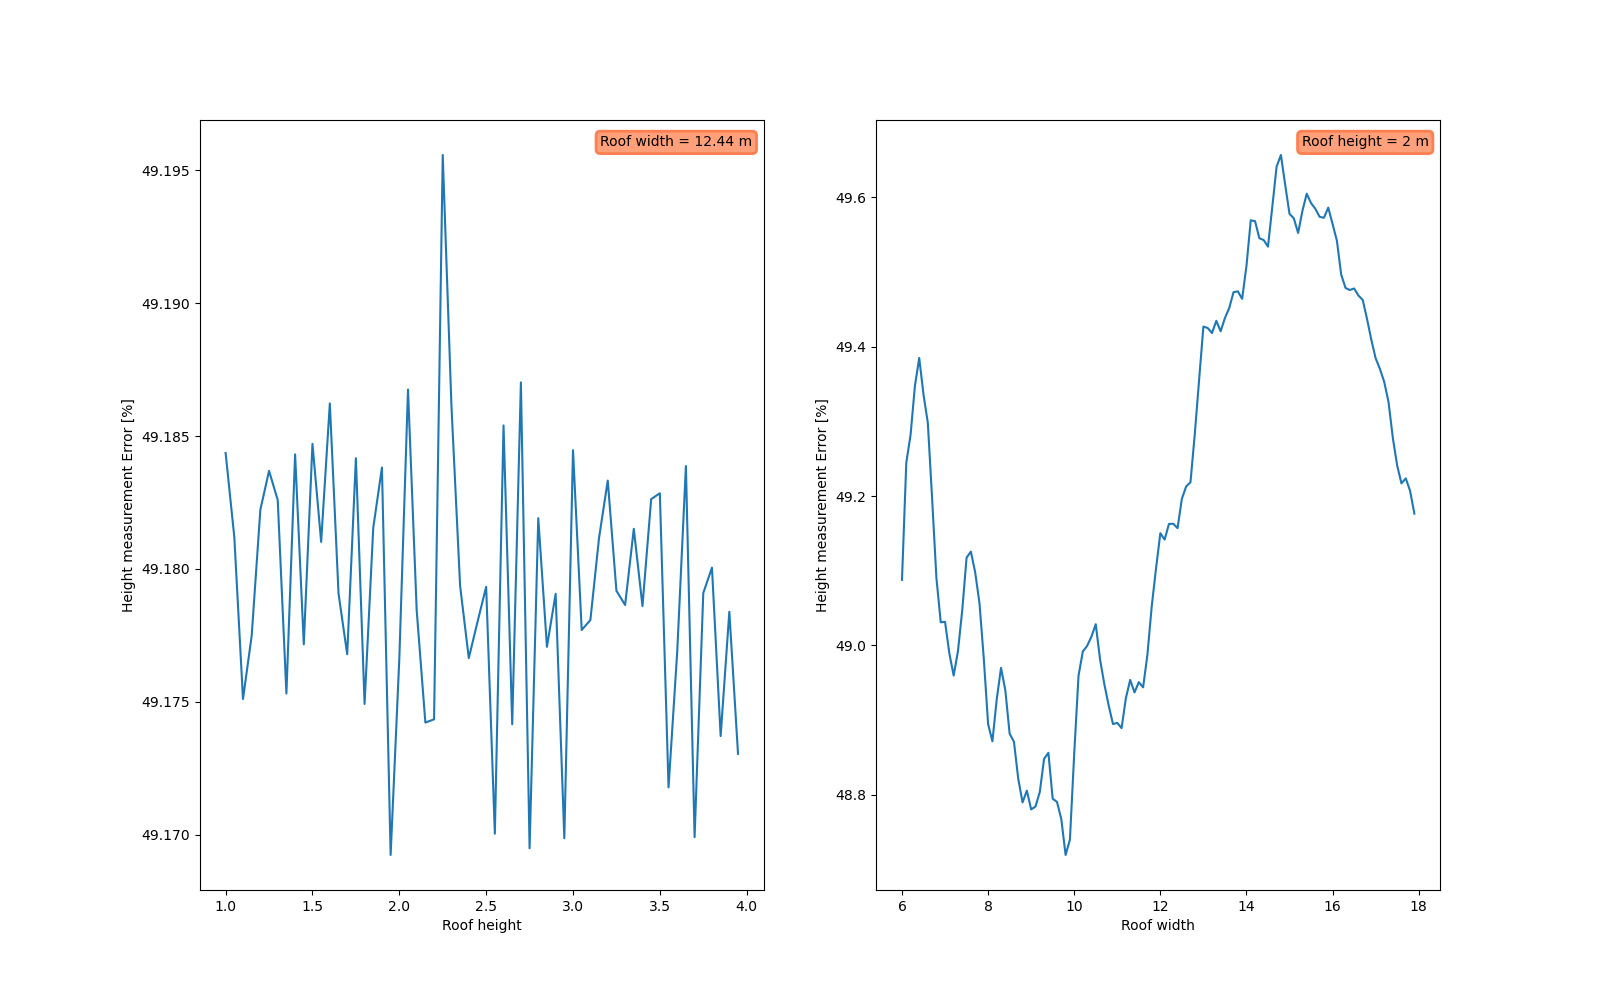

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(16, 10))
axs[0].plot(h_tab, (h_tab - meas_tab_height_avg)/h_tab*100)
axs[0].set_xlabel("Roof height")
# axs[0].set_ylim(5, 17)
axs[0].set_ylabel("Height measurement Error [%]")
axs[0].text(0.98, 0.98, f"Roof width = {width} m", bbox=dict(boxstyle="round", fc="lightsalmon", ec="coral", lw=2), horizontalalignment='right', verticalalignment='top', transform=axs[0].transAxes)

axs[1].plot(w_tab, (height - meas_tab_width_avg)/height*100)
axs[1].set_xlabel("Roof width")
axs[1].set_ylabel("Height measurement Error [%]")
# axs[1].set_ylim(5, 17)
axs[1].text(0.98, 0.98, f"Roof height = {height} m", bbox=dict(boxstyle="round", fc="lightsalmon", ec="coral", lw=2), horizontalalignment='right', verticalalignment='top', transform=axs[1].transAxes);

# LoD 2 (12 pts/m2)
Height - maximum of mesurement grid

In [20]:
def z_roof(X, width, height):
    a = -height/(width/2)
    return a*np.abs(X) + height

In [21]:
def one_mcs_LOD2(angle, width, depth, height):
    init_point = [np.random.uniform(-width/2, -width/2+(1/3)), np.random.uniform(-depth/2, -depth/2+(1/4))]
    x_scan = np.arange(init_point[0] - 2, width/2 + 2, 1/3)
    y_scan = np.arange(init_point[1] - 2, depth/2 + 2, 1/4)

    xx_scan, yy_scan = np.meshgrid(x_scan, y_scan)

    Xr   =  np.cos(angle)*xx_scan + np.sin(angle)*yy_scan  # "cloclwise"
    Yr   = -np.sin(angle)*xx_scan + np.cos(angle)*yy_scan

    Xr_org = Xr.copy()

    Xr = Xr[np.logical_and(abs(Xr) < width/2, abs(Yr) < depth/2)]
    Yr = Yr[np.logical_and(abs(Xr_org) < width/2, abs(Yr) < depth/2)]

    z_meas = z_roof(Xr, width, height)
    return np.max(z_meas)

In [22]:
def monte_carlo_avg_height(width, depth, height):
    return np.mean(np.array([np.mean(np.array([one_mcs_LOD2(angle, width, depth, height) for _ in range(100)])) for angle in np.linspace(0, np.pi/2, 180)]))

In [23]:
def monte_carlo_min_height(width, depth, height):
    return np.min(np.array([np.min(np.array([one_mcs_LOD2(angle, width, depth, height) for _ in range(100)])) for angle in np.linspace(0, np.pi/2, 180)]))

In [134]:
width = 12.44
height = 2
depth = 15.65

In [135]:
xr = np.linspace(-width/2, width/2)
yr = np.linspace(-depth/2, depth/2)

X, Y = np.meshgrid(xr, yr)

In [136]:
angle = np.random.uniform(0, np.pi/2)
init_point = [np.random.uniform(-width/2, -width/2+(1/3)), np.random.uniform(-depth/2, -depth/2+(1/4))]
x_scan = np.arange(init_point[0] - 2, width/2 + 2, 1/3)
y_scan = np.arange(init_point[1] - 2, depth/2 + 2, 1/4)

xx_scan, yy_scan = np.meshgrid(x_scan, y_scan)

Xr   =  np.cos(angle)*xx_scan + np.sin(angle)*yy_scan  # "cloclwise"
Yr   = -np.sin(angle)*xx_scan + np.cos(angle)*yy_scan

Xr_org = Xr.copy()

Xr = Xr[np.logical_and(abs(Xr) < width/2, abs(Yr) < depth/2)]
Yr = Yr[np.logical_and(abs(Xr_org) < width/2, abs(Yr) < depth/2)]

z_meas = z_roof(Xr, width, height)

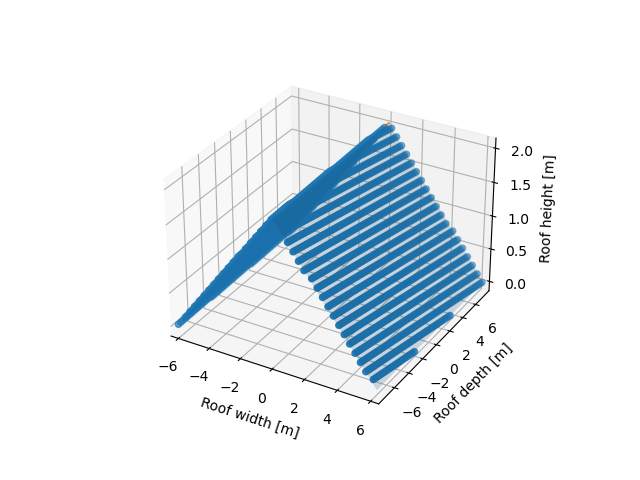

In [137]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# plot the surface
ax.plot_surface(X, Y, z_roof(X, width, height), alpha=0.2)
ax.plot3D(np.zeros(shape=(50, )), np.linspace(-depth/2, depth/2), height)
ax.scatter3D(Xr, Yr, z_meas)

ax.set_xlim(-width/2, width/2)
ax.set_ylim(-depth/2, depth/2)
ax.set_xlabel("Roof width [m]")
ax.set_ylabel("Roof depth [m]")
ax.set_zlabel("Roof height [m]")
plt.show()

Xr_LoD2 = Xr.copy()
Yr_LoD2 = Yr.copy()
z_meas_LoD2 = z_meas.copy()

## Worst-Case scenario measurement error

In [28]:
w_tab = np.arange(6, 18, 0.1)
meas_tab_width_LOD2 = np.array([monte_carlo_min_height(w, depth, height) for w in w_tab])

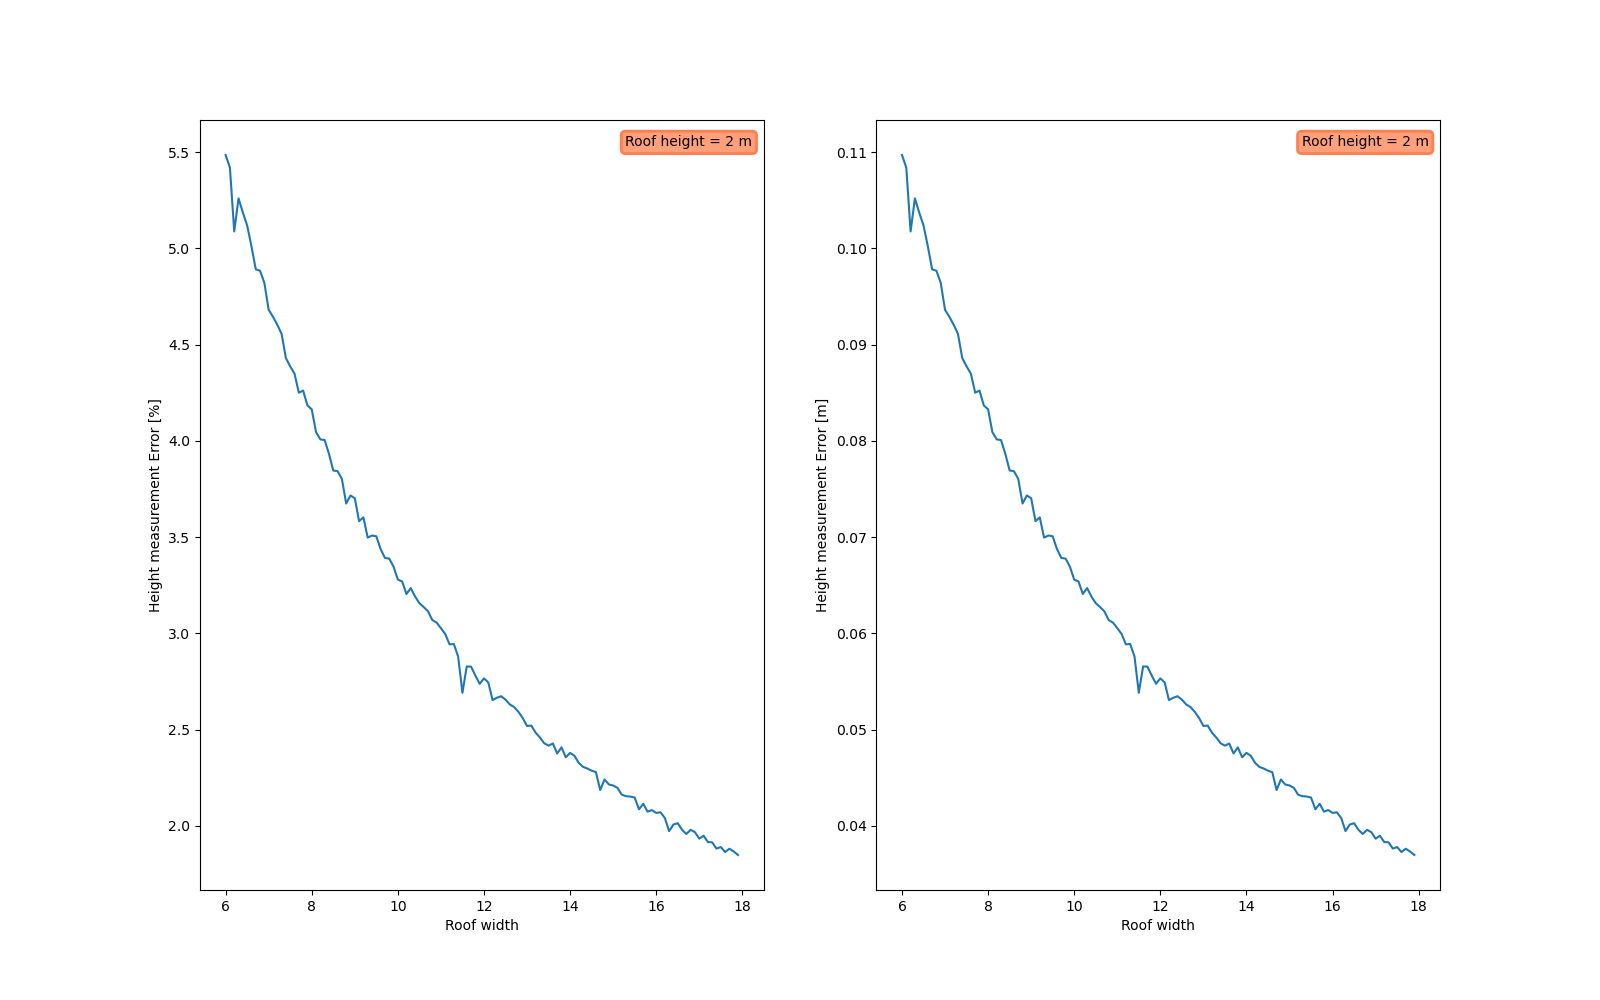

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(16, 10))
axs[0].plot(w_tab, (height - meas_tab_width_LOD2)/height*100)
axs[0].set_xlabel("Roof width")
axs[0].set_ylabel("Height measurement Error [%]")
# axs[0].set_ylim(5, 17)
axs[0].text(0.98, 0.98, f"Roof height = {height} m", bbox=dict(boxstyle="round", fc="lightsalmon", ec="coral", lw=2), horizontalalignment='right', verticalalignment='top', transform=axs[0].transAxes)

axs[1].plot(w_tab, (height - meas_tab_width_LOD2))
axs[1].set_xlabel("Roof width")
axs[1].set_ylabel("Height measurement Error [m]")
axs[1].text(0.98, 0.98, f"Roof height = {height} m", bbox=dict(boxstyle="round", fc="lightsalmon", ec="coral", lw=2), horizontalalignment='right', verticalalignment='top', transform=axs[1].transAxes);

In [30]:
h_tab = np.arange(1, 4, 0.05)
meas_tab_height_LOD2 = np.array([monte_carlo_min_height(width, depth, h) for h in h_tab])

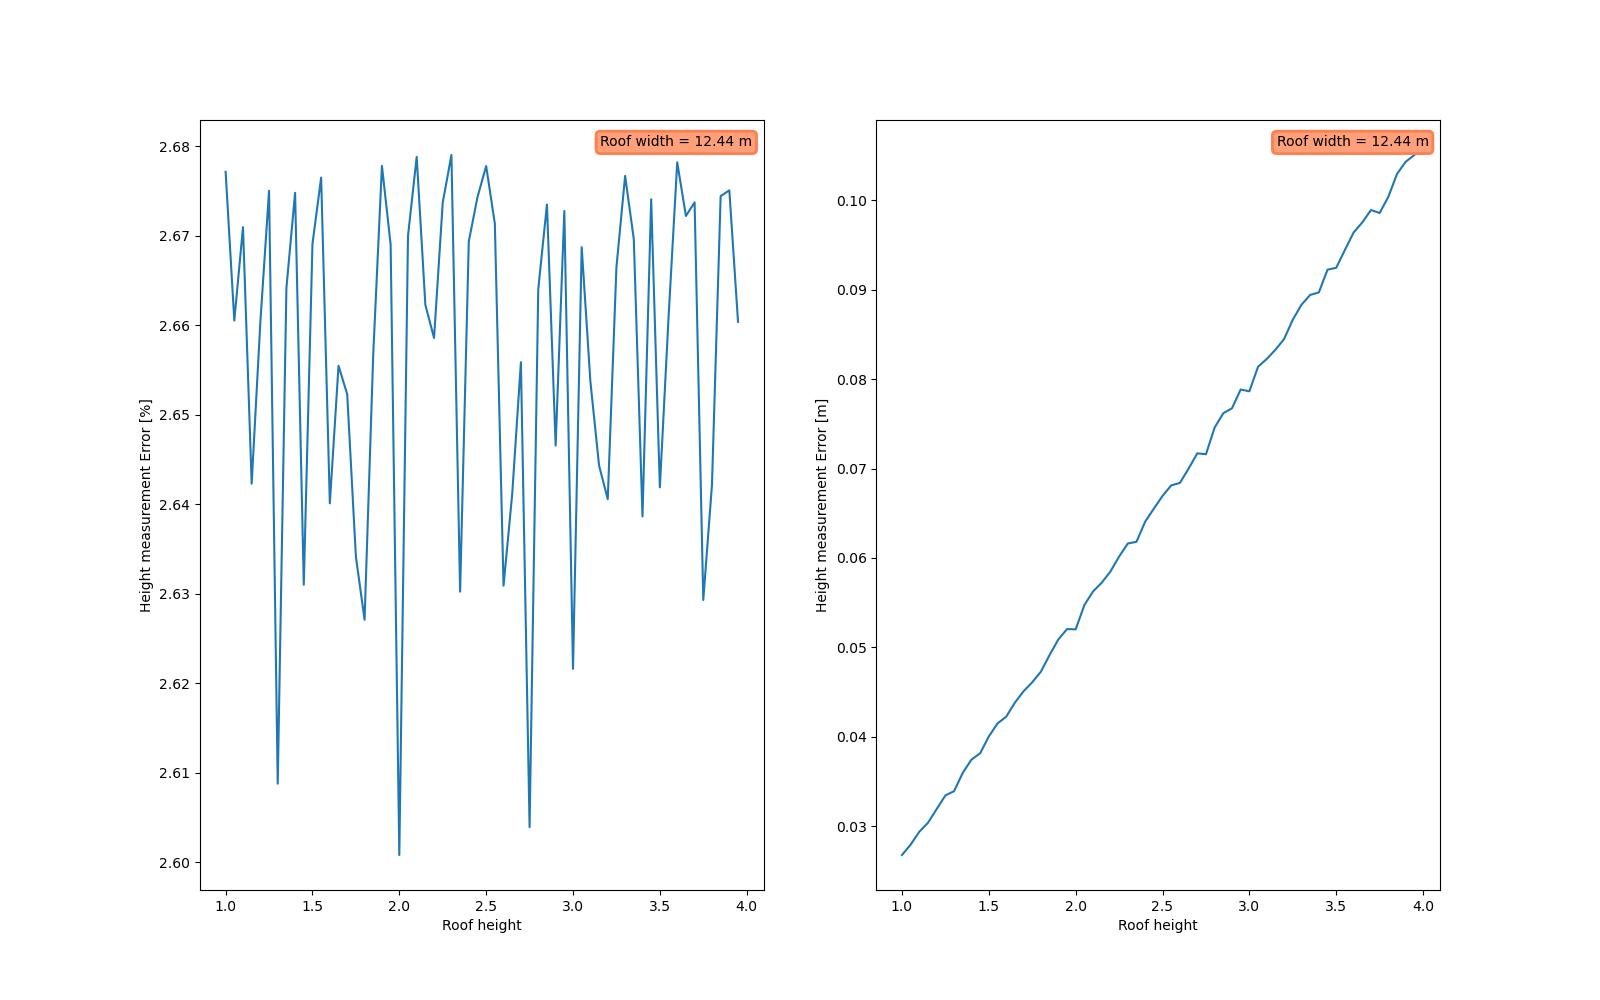

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(16, 10))
axs[0].plot(h_tab, (h_tab - meas_tab_height_LOD2)/h_tab*100)
axs[0].set_xlabel("Roof height")
axs[0].set_ylabel("Height measurement Error [%]")
# axs[0].set_ylim(5, 17)
axs[0].text(0.98, 0.98, f"Roof width = {width} m", bbox=dict(boxstyle="round", fc="lightsalmon", ec="coral", lw=2), horizontalalignment='right', verticalalignment='top', transform=axs[0].transAxes)

axs[1].plot(h_tab, (h_tab - meas_tab_height_LOD2))
axs[1].set_xlabel("Roof height")
axs[1].set_ylabel("Height measurement Error [m]")
axs[1].text(0.98, 0.98, f"Roof width = {width} m", bbox=dict(boxstyle="round", fc="lightsalmon", ec="coral", lw=2), horizontalalignment='right', verticalalignment='top', transform=axs[1].transAxes);

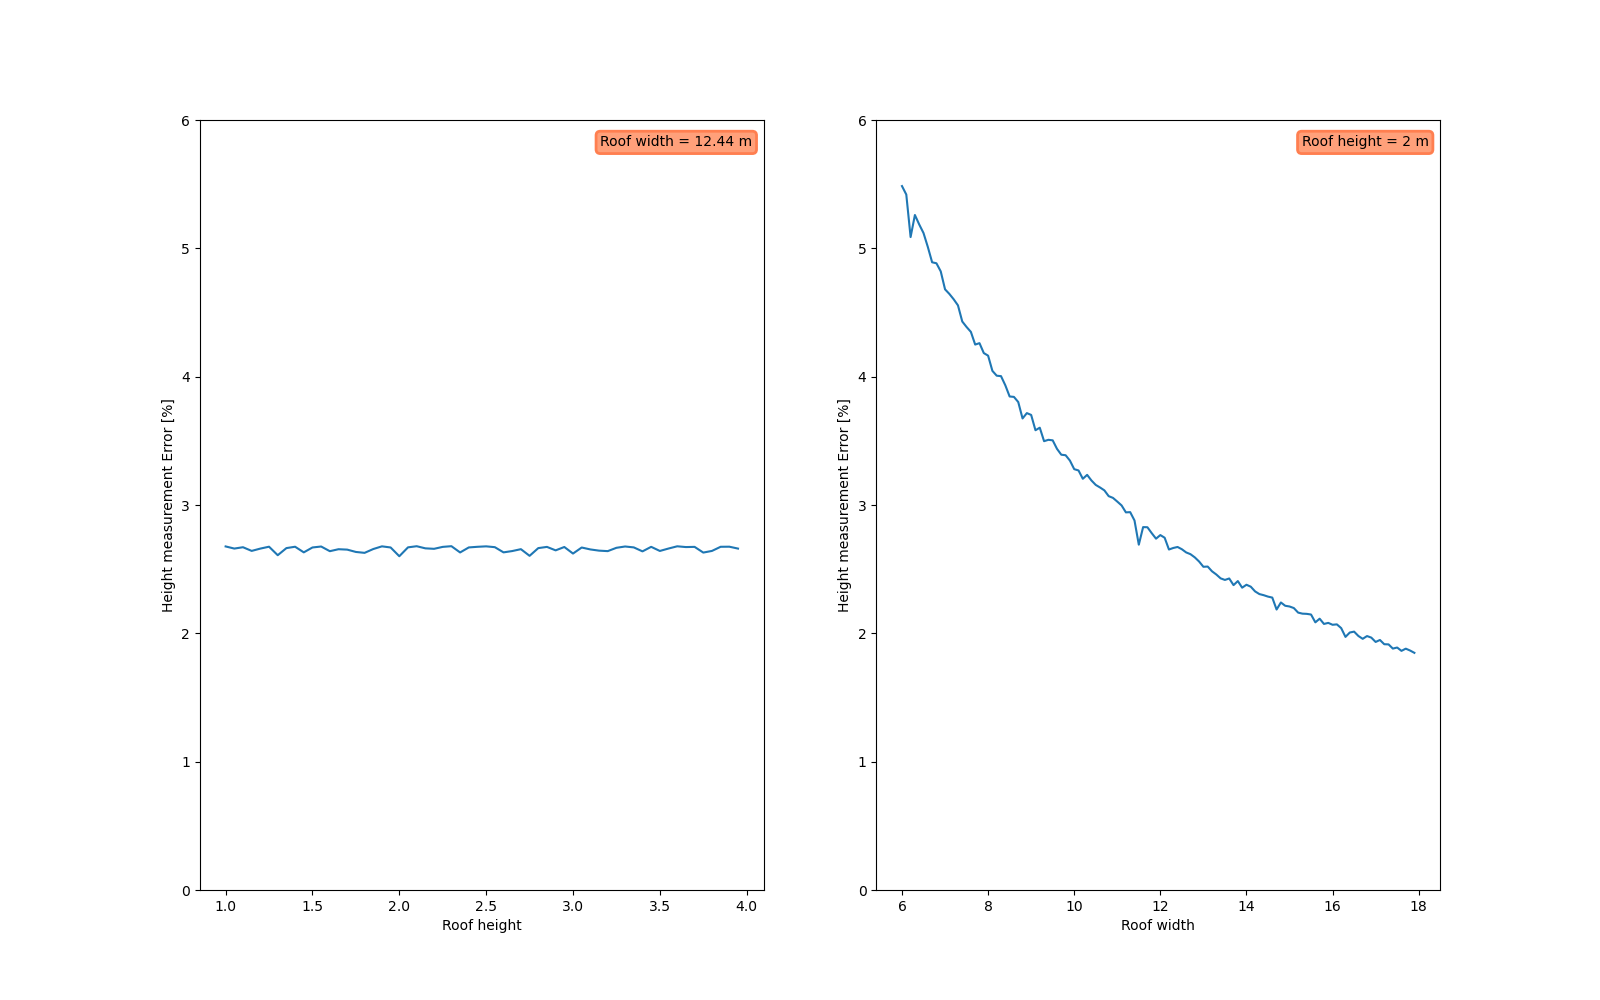

In [39]:
fig, axs = plt.subplots(1, 2, figsize=(16, 10))
axs[0].plot(h_tab, (h_tab - meas_tab_height_LOD2)/h_tab*100)
axs[0].set_xlabel("Roof height")
axs[0].set_ylim(0, 6)
axs[0].set_ylabel("Height measurement Error [%]")
axs[0].text(0.98, 0.98, f"Roof width = {width} m", bbox=dict(boxstyle="round", fc="lightsalmon", ec="coral", lw=2), horizontalalignment='right', verticalalignment='top', transform=axs[0].transAxes)

axs[1].plot(w_tab, (height - meas_tab_width_LOD2)/height*100)
axs[1].set_xlabel("Roof width")
axs[1].set_ylabel("Height measurement Error [%]")
axs[1].set_ylim(0, 6)
axs[1].text(0.98, 0.98, f"Roof height = {height} m", bbox=dict(boxstyle="round", fc="lightsalmon", ec="coral", lw=2), horizontalalignment='right', verticalalignment='top', transform=axs[1].transAxes);

## Average measurement error

In [33]:
w_tab = np.arange(6, 18, 0.1)
meas_tab_width_avg_LOD2 = np.array([monte_carlo_avg_height(w, depth, height) for w in w_tab])

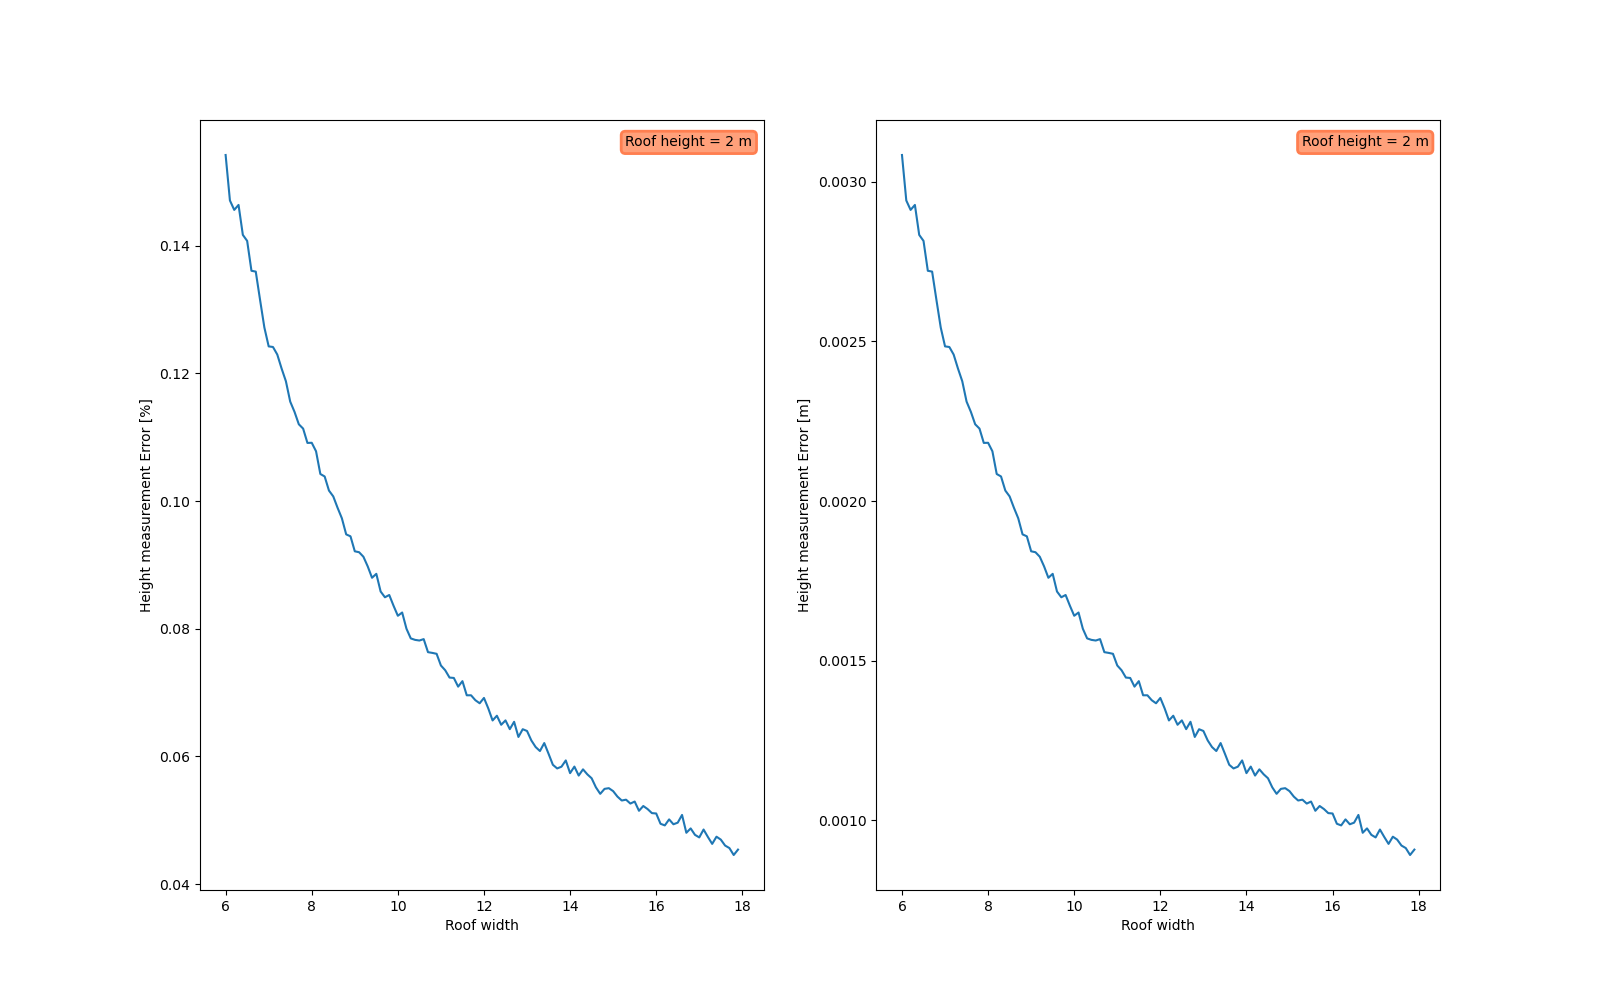

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(16, 10))
axs[0].plot(w_tab, (height - meas_tab_width_avg_LOD2)/height*100)
axs[0].set_xlabel("Roof width")
axs[0].set_ylabel("Height measurement Error [%]")
# axs[0].set_ylim(0, 2)
axs[0].text(0.98, 0.98, f"Roof height = {height} m", bbox=dict(boxstyle="round", fc="lightsalmon", ec="coral", lw=2), horizontalalignment='right', verticalalignment='top', transform=axs[0].transAxes)

axs[1].plot(w_tab, (height - meas_tab_width_avg_LOD2))
axs[1].set_xlabel("Roof width")
axs[1].set_ylabel("Height measurement Error [m]")
axs[1].text(0.98, 0.98, f"Roof height = {height} m", bbox=dict(boxstyle="round", fc="lightsalmon", ec="coral", lw=2), horizontalalignment='right', verticalalignment='top', transform=axs[1].transAxes);

In [35]:
h_tab = np.arange(1, 4, 0.05)
meas_tab_height_avg_LOD2 = np.array([monte_carlo_avg_height(width, depth, h) for h in h_tab])

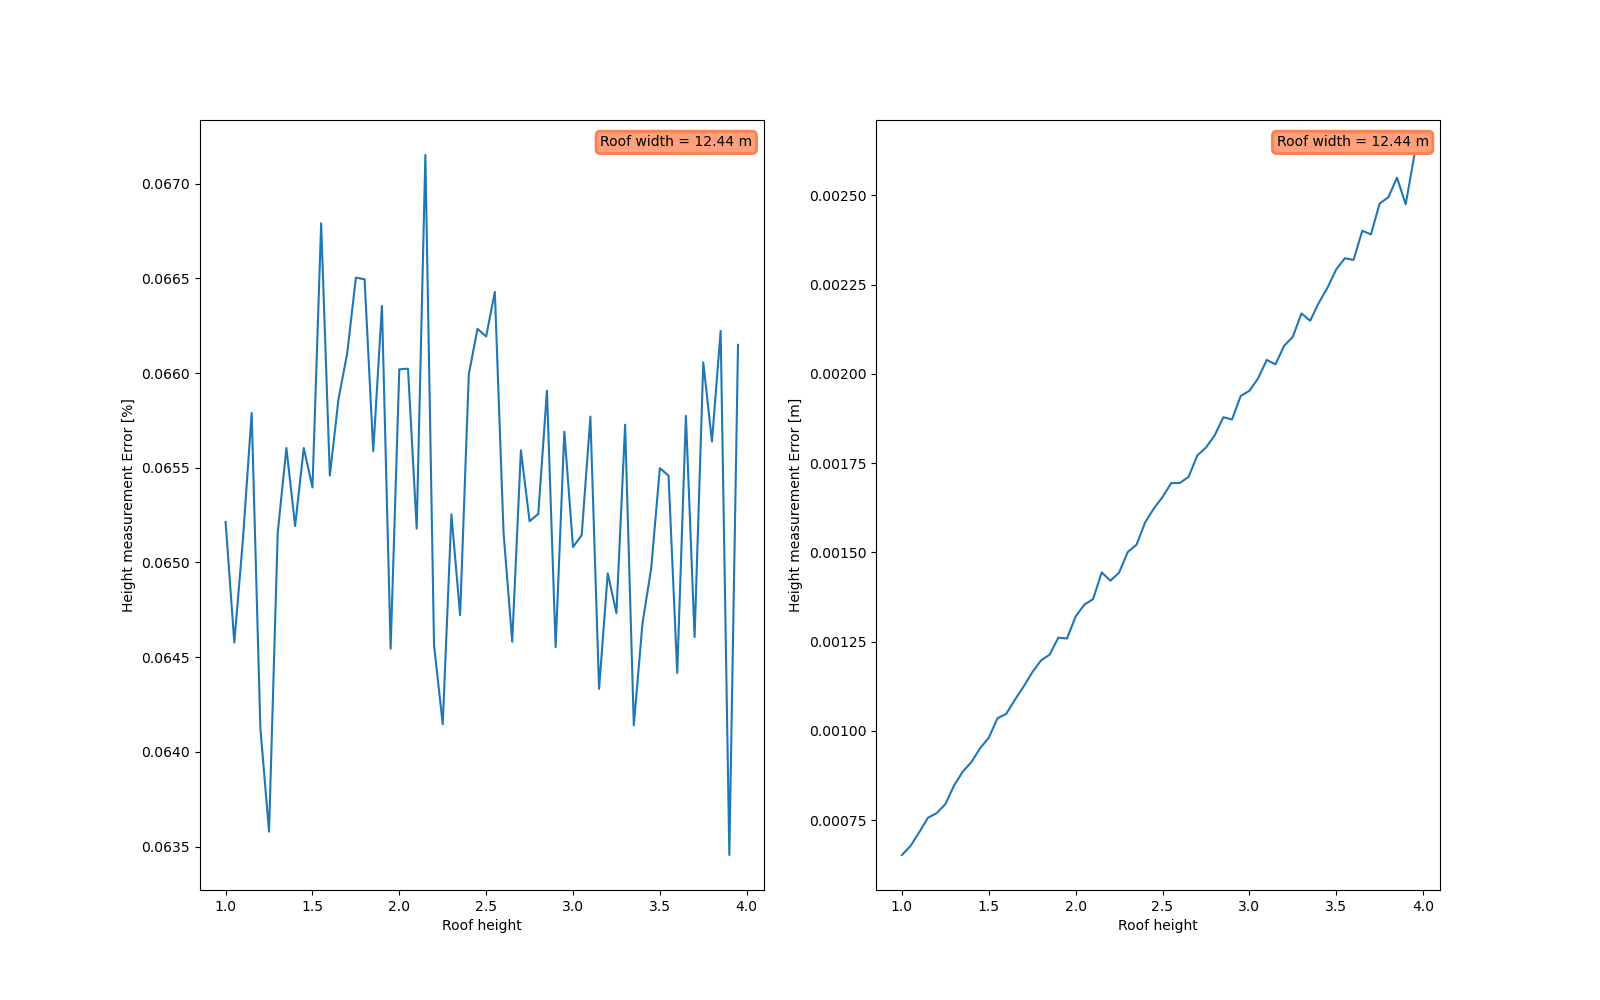

In [36]:
fig, axs = plt.subplots(1, 2, figsize=(16, 10))
axs[0].plot(h_tab, (h_tab - meas_tab_height_avg_LOD2)/h_tab*100)
axs[0].set_xlabel("Roof height")
axs[0].set_ylabel("Height measurement Error [%]")
# axs[0].set_ylim(0, 2)
axs[0].text(0.98, 0.98, f"Roof width = {width} m", bbox=dict(boxstyle="round", fc="lightsalmon", ec="coral", lw=2), horizontalalignment='right', verticalalignment='top', transform=axs[0].transAxes)

axs[1].plot(h_tab, (h_tab - meas_tab_height_avg_LOD2))
axs[1].set_xlabel("Roof height")
axs[1].set_ylabel("Height measurement Error [m]")
axs[1].text(0.98, 0.98, f"Roof width = {width} m", bbox=dict(boxstyle="round", fc="lightsalmon", ec="coral", lw=2), horizontalalignment='right', verticalalignment='top', transform=axs[1].transAxes);

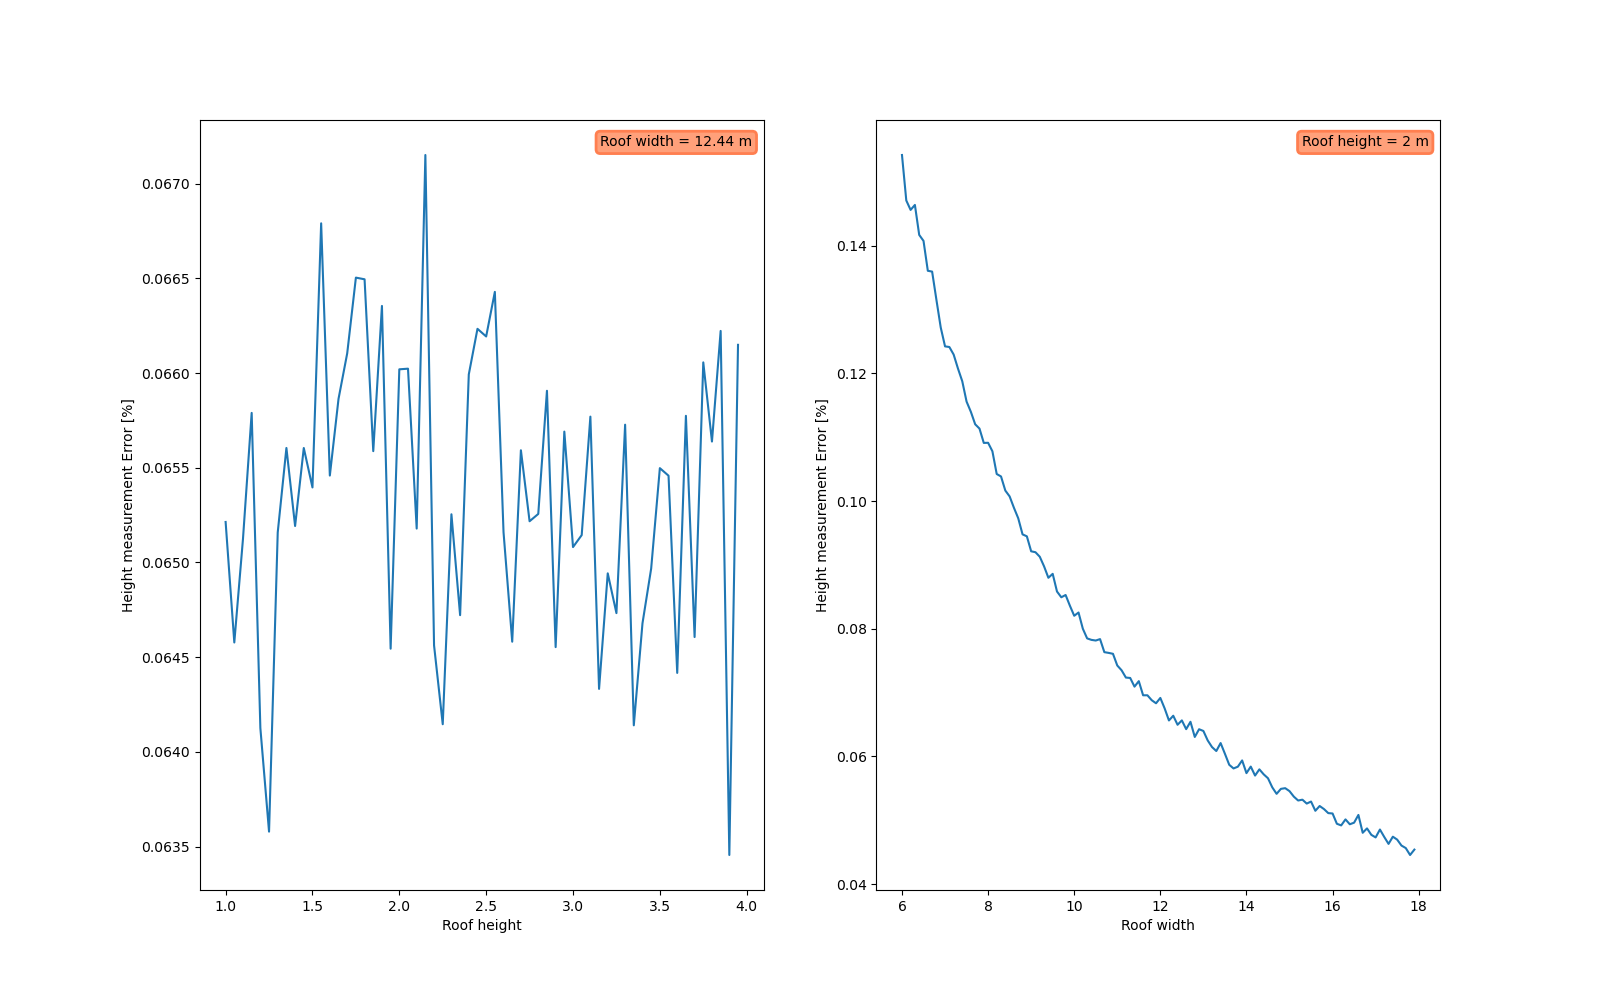

In [37]:
fig, axs = plt.subplots(1, 2, figsize=(16, 10))
axs[0].plot(h_tab, (h_tab - meas_tab_height_avg_LOD2)/h_tab*100)
axs[0].set_xlabel("Roof height")
# axs[0].set_ylim(5, 17)
axs[0].set_ylabel("Height measurement Error [%]")
axs[0].text(0.98, 0.98, f"Roof width = {width} m", bbox=dict(boxstyle="round", fc="lightsalmon", ec="coral", lw=2), horizontalalignment='right', verticalalignment='top', transform=axs[0].transAxes)

axs[1].plot(w_tab, (height - meas_tab_width_avg_LOD2)/height*100)
axs[1].set_xlabel("Roof width")
axs[1].set_ylabel("Height measurement Error [%]")
# axs[1].set_ylim(5, 17)
axs[1].text(0.98, 0.98, f"Roof height = {height} m", bbox=dict(boxstyle="round", fc="lightsalmon", ec="coral", lw=2), horizontalalignment='right', verticalalignment='top', transform=axs[1].transAxes);

# Final Figures - LoD1 and LoD 2 comparison

## Maximal measurement error

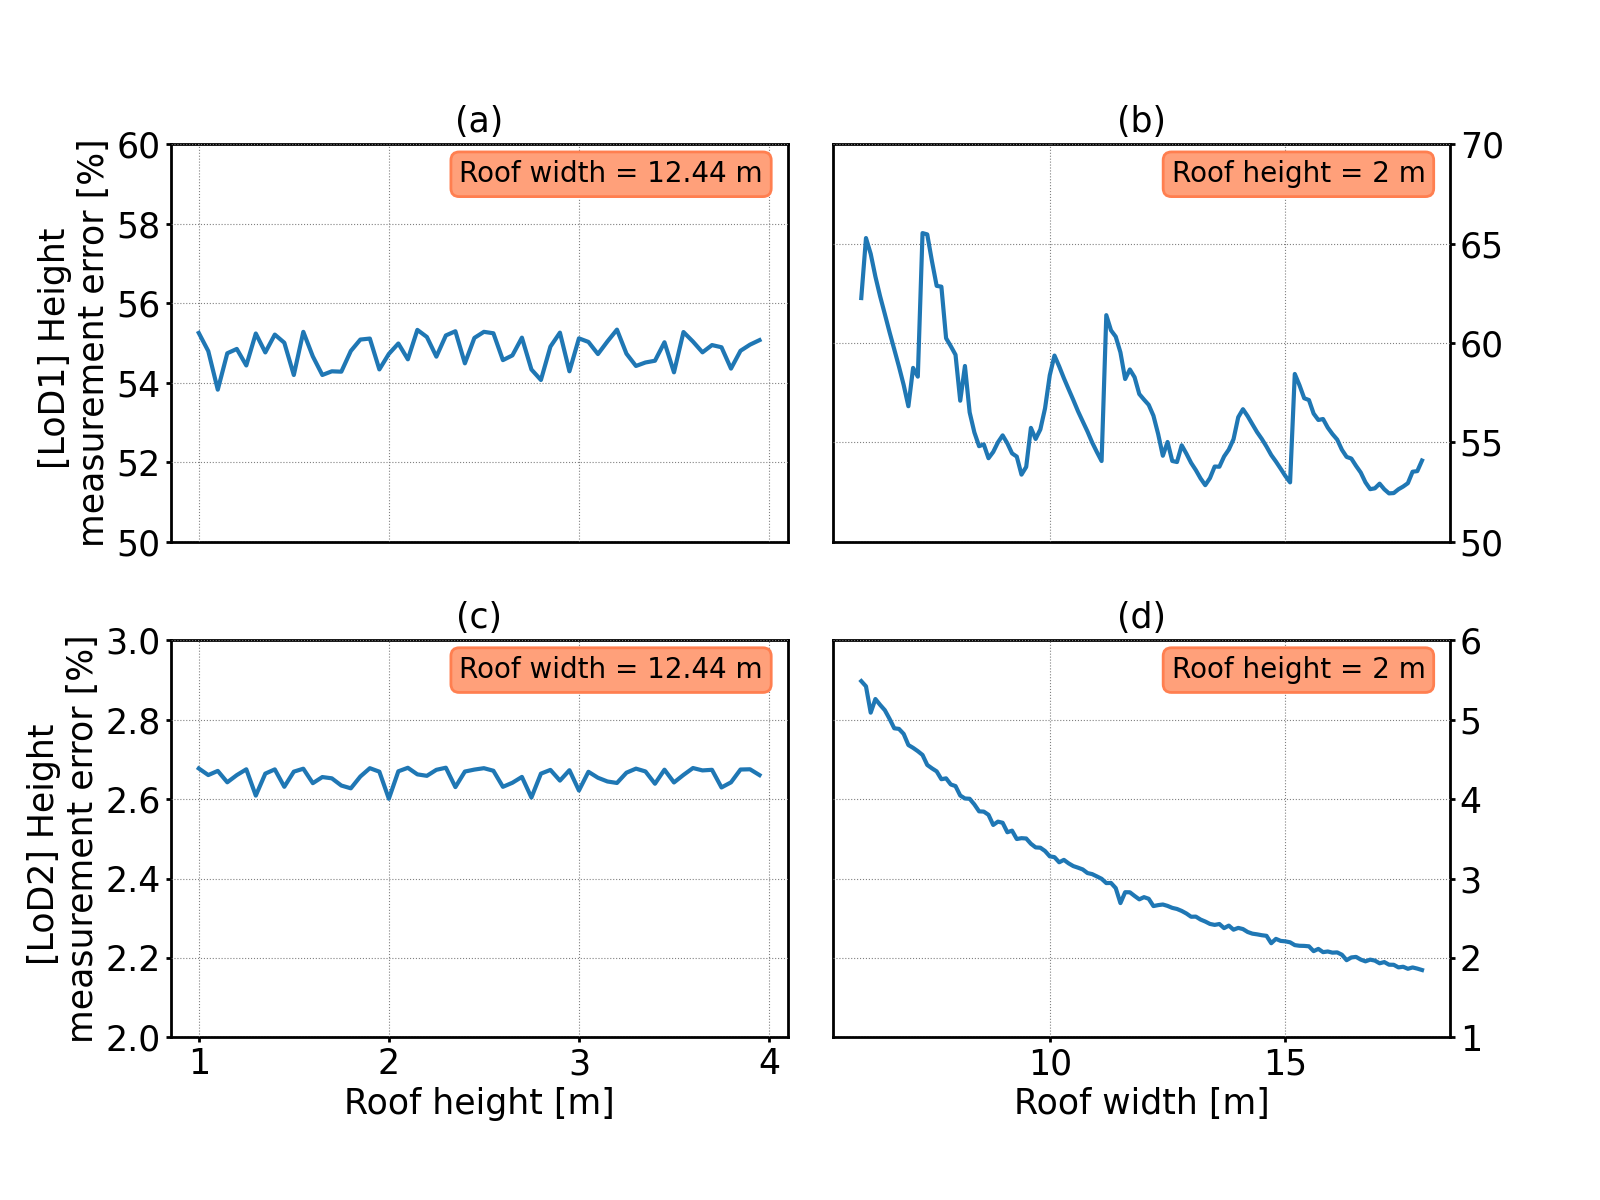

In [213]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
plt.tight_layout(pad=10, h_pad=5, w_pad=0.2)
fs = 25
fs_inset = 20
lw = 3

axs[0, 0].plot(h_tab, (h_tab - meas_tab_height)/h_tab*100, lw=lw)
# axs[0,0].set_xlabel("Roof height", fontsize=fs)
axs[0, 0].set_ylim(50, 60)
axs[0, 0].set_ylabel("[LoD1] Height \nmeasurement error [%]", fontsize=fs)
axs[0, 0].text(0.96, 0.96, f"Roof width = {width} m", bbox=dict(boxstyle="round", fc="lightsalmon", ec="coral", lw=2), horizontalalignment='right', verticalalignment='top', transform=axs[0, 0].transAxes, fontsize=fs_inset)

axs[0, 1].plot(w_tab, (height - meas_tab_width)/height*100, lw=lw)
# axs[0, 1].set_xlabel("Roof width", fontsize=fs)
axs[0, 1].set_ylim(50, 70)
axs[0, 1].text(0.96, 0.96, f"Roof height = {height} m", bbox=dict(boxstyle="round", fc="lightsalmon", ec="coral", lw=2), horizontalalignment='right', verticalalignment='top', transform=axs[0, 1].transAxes, fontsize=fs_inset);


axs[1, 0].plot(h_tab, (h_tab - meas_tab_height_LOD2)/h_tab*100, lw=lw)
axs[1, 0].set_xlabel("Roof height [m]", fontsize=fs)
axs[1, 0].set_ylim(2, 3)
axs[1, 0].set_ylabel("[LoD2] Height \nmeasurement error [%]", fontsize=fs)
axs[1, 0].text(0.96, 0.96, f"Roof width = {width} m", bbox=dict(boxstyle="round", fc="lightsalmon", ec="coral", lw=2), horizontalalignment='right', verticalalignment='top', transform=axs[1, 0].transAxes, fontsize=fs_inset)

axs[1, 1].plot(w_tab, (height - meas_tab_width_LOD2)/height*100, lw=lw)
axs[1,1].set_xlabel("Roof width [m]", fontsize=fs)
axs[1, 1].set_ylim(1, 6)
axs[1,1].text(0.96, 0.96, f"Roof height = {height} m", bbox=dict(boxstyle="round", fc="lightsalmon", ec="coral", lw=2), horizontalalignment='right', verticalalignment='top', transform=axs[1, 1].transAxes, fontsize=fs_inset);

axs[0, 0].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

axs[0, 1].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

for ax in axs[:, 1].flatten():
    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()

for ax in axs.flatten():
    ax.tick_params(axis='both', which='major', labelsize=fs, width=2)

for ax in axs.flatten():
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(2)
        ax.spines[axis].set_zorder(0)

for ax, lab in zip(axs.flatten(), ["(a)", "(b)", "(c)", "(d)"]):
    ax.set_title(lab, fontsize=fs, y=1.01)

for ax in axs.flatten():
    ax.grid(True)

plt.rc('grid', linestyle=":", color='gray')

plt.savefig("LoD1_2_max_error.pdf")
plt.savefig("LoD1_2_max_error.png")


## Average measurement error

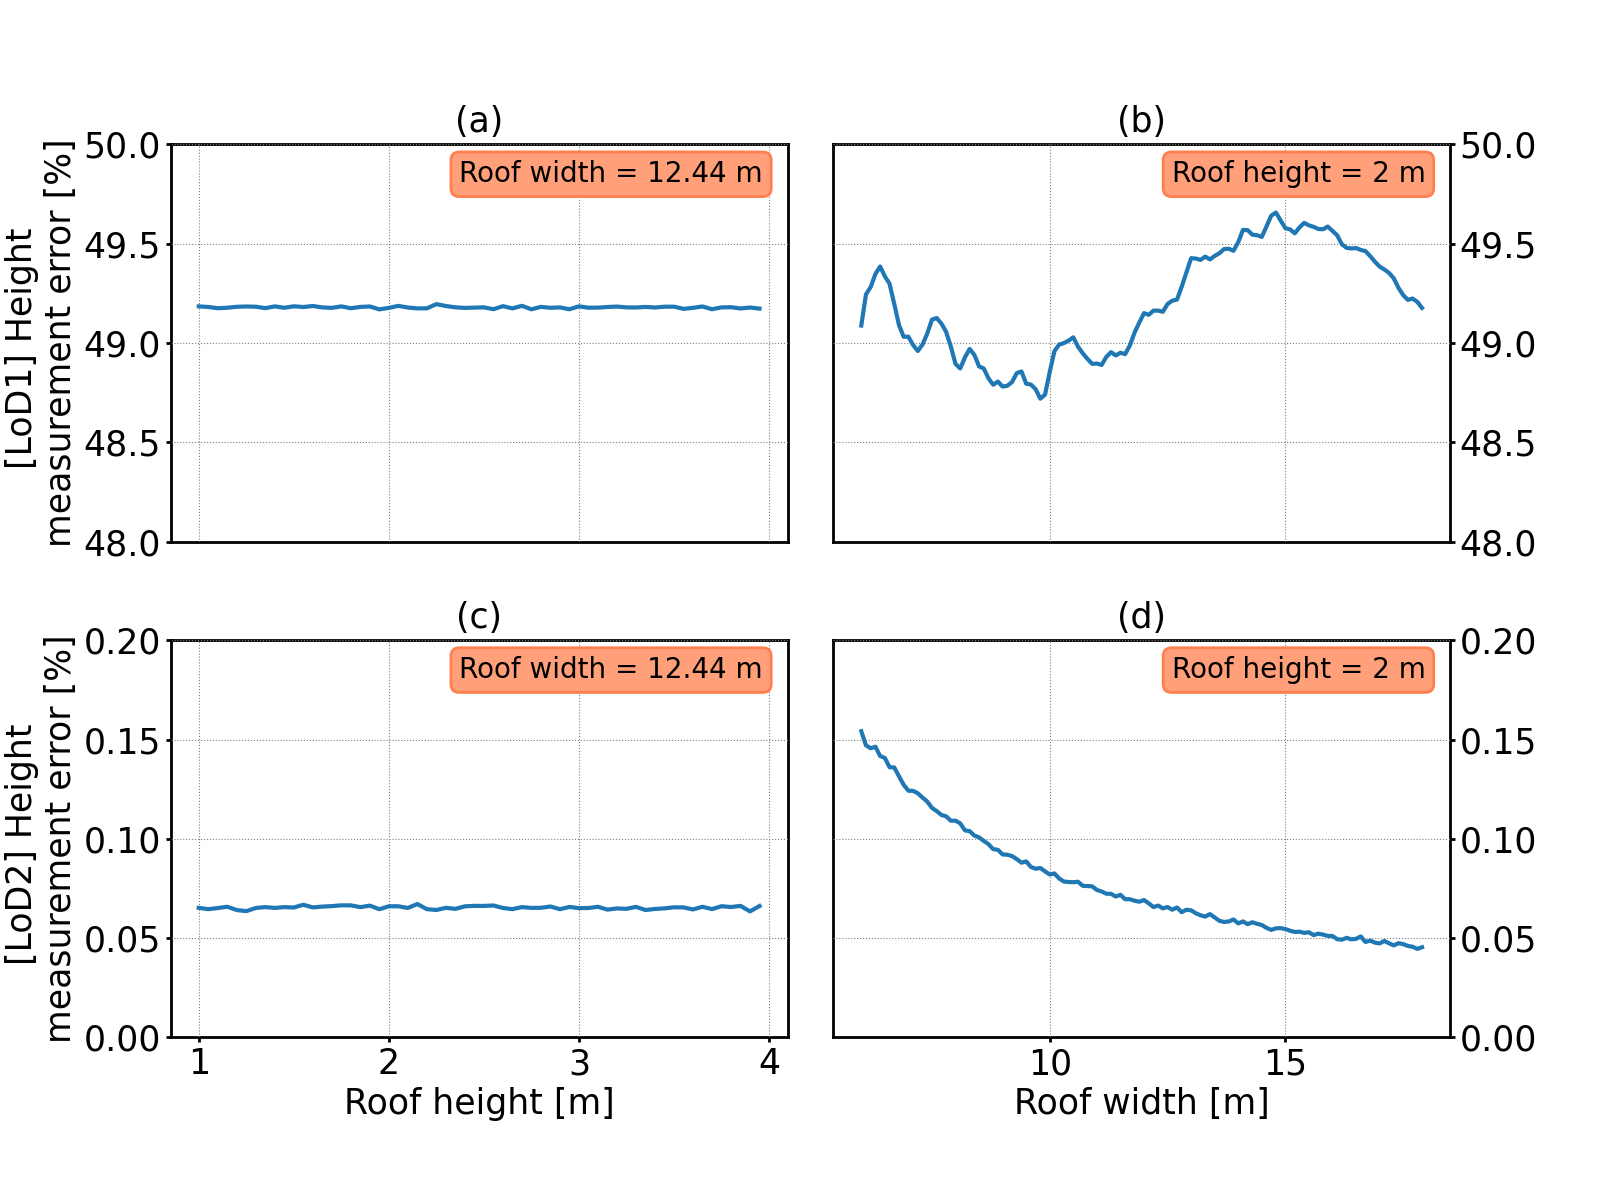

In [215]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
plt.tight_layout(pad=10, h_pad=5, w_pad=0.2)
fs = 25
fs_inset = 20
lw = 3

axs[0, 0].plot(h_tab, (h_tab - meas_tab_height_avg)/h_tab*100, lw=lw)
# axs[0,0].set_xlabel("Roof height", fontsize=fs)
axs[0, 0].set_ylim(48, 50)
axs[0, 0].set_ylabel("[LoD1] Height \nmeasurement error [%]", fontsize=fs)
axs[0, 0].text(0.96, 0.96, f"Roof width = {width} m", bbox=dict(boxstyle="round", fc="lightsalmon", ec="coral", lw=2), horizontalalignment='right', verticalalignment='top', transform=axs[0, 0].transAxes, fontsize=fs_inset)

axs[0, 1].plot(w_tab, (height - meas_tab_width_avg)/height*100, lw=lw)
# axs[0, 1].set_xlabel("Roof width", fontsize=fs)
axs[0, 1].set_ylim(48, 50)
axs[0, 1].text(0.96, 0.96, f"Roof height = {height} m", bbox=dict(boxstyle="round", fc="lightsalmon", ec="coral", lw=2), horizontalalignment='right', verticalalignment='top', transform=axs[0, 1].transAxes, fontsize=fs_inset);


axs[1, 0].plot(h_tab, (h_tab - meas_tab_height_avg_LOD2)/h_tab*100, lw=lw)
axs[1, 0].set_xlabel("Roof height [m]", fontsize=fs)
axs[1, 0].set_ylim(0, 0.2)
axs[1, 0].set_ylabel("[LoD2] Height \nmeasurement error [%]", fontsize=fs)
axs[1, 0].text(0.96, 0.96, f"Roof width = {width} m", bbox=dict(boxstyle="round", fc="lightsalmon", ec="coral", lw=2), horizontalalignment='right', verticalalignment='top', transform=axs[1, 0].transAxes, fontsize=fs_inset)

axs[1, 1].plot(w_tab, (height - meas_tab_width_avg_LOD2)/height*100, lw=lw)
axs[1, 1].set_xlabel("Roof width [m]", fontsize=fs)
axs[1, 1].set_ylim(0, 0.2)
axs[1,1].text(0.96, 0.96, f"Roof height = {height} m", bbox=dict(boxstyle="round", fc="lightsalmon", ec="coral", lw=2), horizontalalignment='right', verticalalignment='top', transform=axs[1, 1].transAxes, fontsize=fs_inset);

axs[0, 0].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

axs[0, 1].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

for ax in axs[:, 1].flatten():
    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()

for ax in axs.flatten():
    ax.tick_params(axis='both', which='major', labelsize=fs, width=2)

for ax in axs.flatten():
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(2)
        ax.spines[axis].set_zorder(0)

for ax, lab in zip(axs.flatten(), ["(a)", "(b)", "(c)", "(d)"]):
    ax.set_title(lab, fontsize=fs, y=1.01)

for ax in axs.flatten():
    ax.grid(True)

plt.rc('grid', linestyle=":", color='gray')

plt.savefig("LoD1_2_avg_error.pdf")
plt.savefig("LoD1_2_avg_error.png")


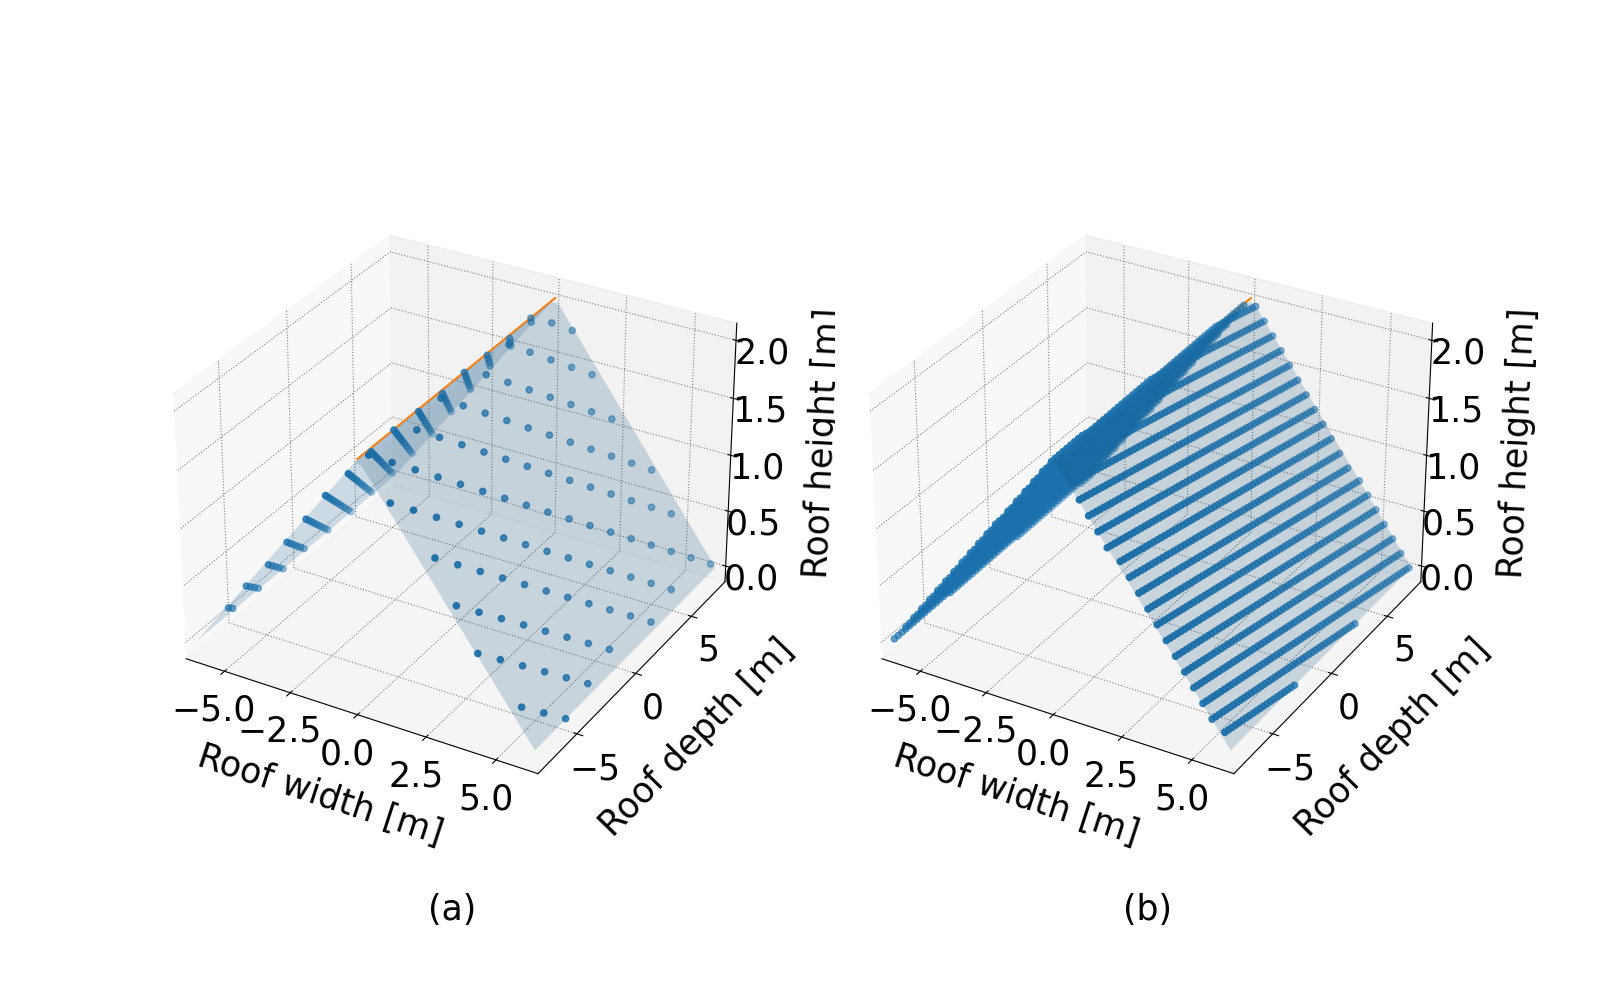

In [234]:
fig, axs = plt.subplots(1, 2, subplot_kw={"projection": "3d"}, figsize=(16, 10))
plt.tight_layout(pad=10, h_pad=5, w_pad=5)
fs_l = 25
linespac = 20

# plot the surface
axs[0].plot_surface(X, Y, z_roof(X, width, height), alpha=0.2)
axs[0].plot3D(np.zeros(shape=(50, )), np.linspace(-depth/2, depth/2), height)
axs[0].scatter3D(Xr_LoD1, Yr_LoD1, z_meas_LoD1)

axs[0].set_xlim(-width/2, width/2)
axs[0].set_ylim(-depth/2, depth/2)
axs[0].set_xlabel("Roof width [m]", fontsize=fs_l, labelpad=linespac)
axs[0].set_ylabel("Roof depth [m]", fontsize=fs_l, labelpad=linespac)
axs[0].set_zlabel("Roof height [m]", fontsize=fs_l, labelpad=linespac)

axs[1].plot_surface(X, Y, z_roof(X, width, height), alpha=0.2)
axs[1].plot3D(np.zeros(shape=(50, )), np.linspace(-depth/2, depth/2), height)
axs[1].scatter3D(Xr_LoD2, Yr_LoD2, z_meas_LoD2)

axs[1].set_xlim(-width/2, width/2)
axs[1].set_ylim(-depth/2, depth/2)
axs[1].set_xlabel("Roof width [m]", fontsize=fs_l, labelpad=linespac)
axs[1].set_ylabel("Roof depth [m]", fontsize=fs_l, labelpad=linespac)
axs[1].set_zlabel("Roof height [m]", fontsize=fs_l, labelpad=linespac)

axs[0].set_title("(a)", fontsize=fs, y=-0.2)
axs[1].set_title("(b)", fontsize=fs, y=-0.2)

for ax in axs.flatten():
    ax.tick_params(axis='both', which='major', labelsize=fs, width=2)

for ax in axs.flatten():
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(2)
        ax.spines[axis].set_zorder(0)

plt.savefig("LoD1_2_grids.pdf")
plt.savefig("LoD1_2_grids.png")

plt.show()